## DSC630 : Final Project (Stroke Prediction)
## Author   : Anjani Bonda
## Date      : 11/18/2022

OVERVIEW:

Step1 - Importing model data.

Step2 - Dataset cleansing and adding dummy categorical variables.

Step3 - Modeling - As my target variable is a binary value (either stroke or not), I will be performing classification based model using KNN for finding the outcome.

Steps to be performed as part of Modeling:
<br> 1. Split the data into train/test (75/25) with stroke as the target variable. I will be dropping ID variable from dataset as the feature has no bearing.
<br> 2. Applying knn classification model to predict the outcome. 
<br> 3. Scale the data using standard scalar, create a pipe with knn and then apply grid search using n_neighbors
<br> 4. Calculate the accuracy/precision/recall and f1 score along with a confusion matrix of result set. 

The result is that there is  >90% accuracy, but model could not detect true positives due to train dataset imbalance.

Step4 - Correct the imbalances in train using SMOTE to rebalance underbalanced class.

Step5 - Retrained the model using balanced dataset whics resulted in a little reduction in accuracy, but improved identification of True positives.

In [20]:
#Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#Import source dataset
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [22]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**attributes information**
<br>The data contains 5110 observations with 12 attributes.

<br>id: unique identifier.
<br>gender: "Male", "Female" or "Other".
<br>age: age of the patient.
<br>hypertension: hypertension means high blood pressure. 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
<br>heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
<br>ever_married: "No" or "Yes".
<br>work_type: "children", "Govt_job", "Never_worked", "Private" or "Self-employed".
<br>Residence_type: "Rural" or "Urban".
<br>avg_glucose_level: average glucose level in blood.
<br>bmi: body mass index, As a measure of obesity.
<br>smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*.
<br>stroke: 1 if the patient had a stroke or 0 if not.

    *Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

In [23]:
#Check for for Missing values
stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [24]:
#Set missing values in bmi column to median value
stroke['bmi'] = stroke['bmi'].fillna(stroke['bmi'].median())
stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [25]:
#Check basic info of all the data
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [26]:
#Check info of the observaions which doesn't have stroke
stroke[stroke['stroke']==1].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.090361,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,5.861877,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,27.000000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,28.100000,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,32.500000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


In [27]:
#Check info of the observaions which  have stroke
stroke[stroke['stroke']==0].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.0
mean,36487.236371,41.971545,0.088871,0.047110,104.795513,28.799115,0.0
std,21120.133386,22.291940,0.284586,0.211895,43.846069,7.777269,0.0
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.0
25%,17762.000000,24.000000,0.000000,0.000000,77.120000,23.600000,0.0
50%,36958.000000,43.000000,0.000000,0.000000,91.470000,28.100000,0.0
75%,54497.000000,59.000000,0.000000,0.000000,112.830000,32.800000,0.0
max,72940.000000,82.000000,1.000000,1.000000,267.760000,97.600000,0.0


#Observations:
<br>4.8% of the observation in this dataset had stroke.
<br>There is a big difference between those who have stroke and those who don't have stroke. Among those who have a stroke - the average age and average glucose level is significantly higher and the number of people with heart disease and hypertension is significantly higher.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

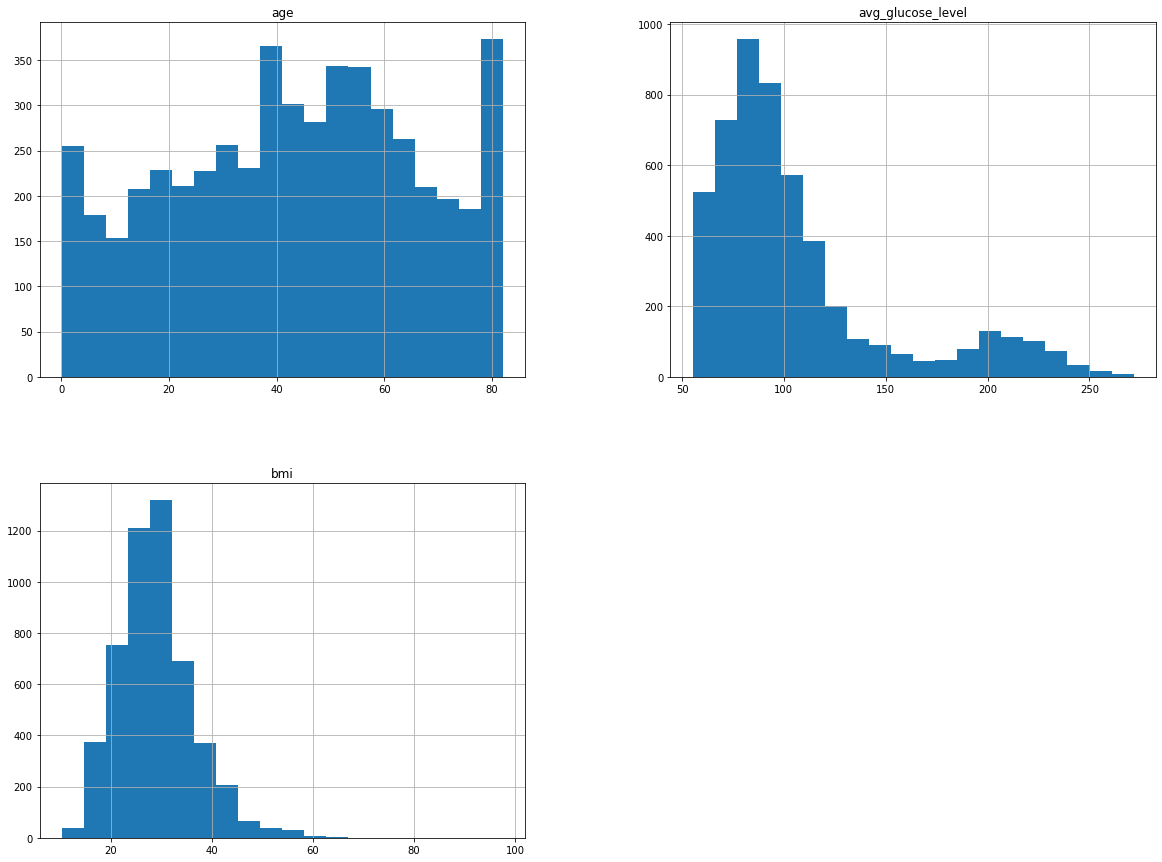

In [28]:
#numeric attributes histograms
atttibutes_hist = stroke[["age", "avg_glucose_level", "bmi"]].hist(bins=20, figsize=(20,15))
atttibutes_hist

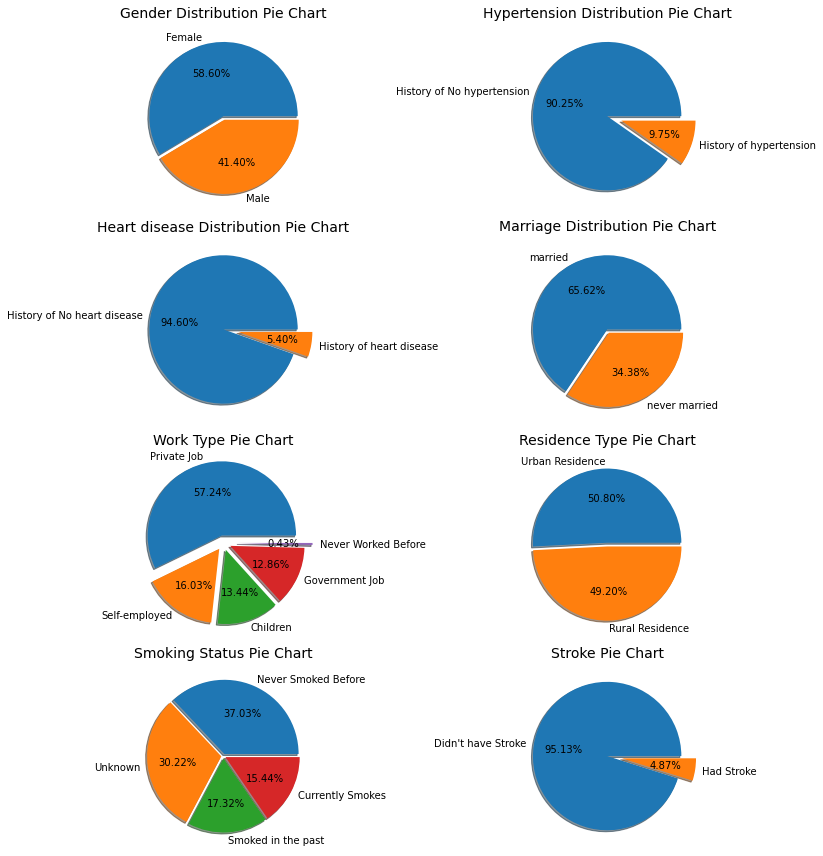

In [29]:
#categorical attributes histograms (as pie charts)
fig, ax = plt.subplots(4,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = stroke['gender'].value_counts().index.tolist()[:2]
values = stroke['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax1.set_title("Gender Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["History of No hypertension", "History of hypertension"]
values = stroke['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax2.set_title("Hypertension Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["History of No heart disease", "History of heart disease"]
values = stroke['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax3.set_title("Heart disease Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["married", "never married"]
values = stroke['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax4.set_title("Marriage Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Private Job", "Self-employed", "Children", "Government Job", "Never Worked Before"]
values = stroke['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type Pie Chart", fontdict={'fontsize': 14})

labels = ["Urban Residence", "Rural Residence"]
values = stroke['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax6.set_title("Residence Type Pie Chart", fontdict={'fontsize': 14})

labels = ["Never Smoked Before", "Unknown", "Smoked in the past", "Currently Smokes"]
values = stroke['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0.03, 0.03, 0.03, 0.03])
ax7.set_title("Smoking Status Pie Chart", fontdict={'fontsize': 14})

labels = ["Didn't have Stroke", "Had Stroke"]
values = stroke['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax8.set_title("Stroke Pie Chart", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

In [30]:
#validating type values and counts for gender attribute
print(stroke['gender'].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


#Observation: Above results show that there is an outlier - which will be removed.

In [32]:
#removing outlier
stroke = stroke[stroke['gender'] != "Other"]
stroke['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [33]:
#Creating list of columns that have categorical data
catCols = [col for col in stroke.columns if stroke[col].dtype=="O"]
catCols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [34]:
#creating dummy variables for all categorical columns
from sklearn.preprocessing import LabelEncoder # loading library
label_encoder = LabelEncoder() # setting encoder function
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output
    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
strokeCat = MultiColumnLabelEncoder(columns = catCols).fit_transform(stroke)

In [35]:
#valdidating categorical value conversion
strokeCat.head

<bound method NDFrame.head of          id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
1     51676       0  61.0             0              0             1   
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5108  37544       1  51.0             0              0             1   
5109  44679       0  44.0             0              0             1   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  \
0             2              

In [36]:
#Correlation Matrix
strokeCat.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.001929,0.003677,0.003610,-0.001253,0.013944,-0.015730,-0.001219,0.000943,0.005708,0.014139,0.006430
gender,0.001929,1.000000,-0.027752,0.021223,0.085685,-0.030171,0.056576,-0.006105,0.054722,-0.026452,-0.062423,0.009081
age,0.003677,-0.027752,1.000000,0.276367,0.263777,0.679084,-0.361686,0.014031,0.238323,0.324211,0.265165,0.245239
hypertension,0.003610,0.021223,0.276367,1.000000,0.108292,0.164187,-0.051772,-0.007980,0.174540,0.158252,0.111018,0.127891
heart_disease,-0.001253,0.085685,0.263777,0.108292,1.000000,0.114601,-0.028031,0.003045,0.161907,0.036879,0.048445,0.134905
ever_married,0.013944,-0.030171,0.679084,0.164187,0.114601,1.000000,-0.352831,0.005988,0.155329,0.334770,0.259604,0.108299
work_type,-0.015730,0.056576,-0.361686,-0.051772,-0.028031,-0.352831,1.000000,-0.007348,-0.050492,-0.299218,-0.305942,-0.032323
Residence_type,-0.001219,-0.006105,0.014031,-0.007980,0.003045,0.005988,-0.007348,1.000000,-0.004783,-0.000444,0.008168,0.015415
avg_glucose_level,0.000943,0.054722,0.238323,0.174540,0.161907,0.155329,-0.050492,-0.004783,1.000000,0.167033,0.063498,0.131991
bmi,0.005708,-0.026452,0.324211,0.158252,0.036879,0.334770,-0.299218,-0.000444,0.167033,1.000000,0.218928,0.036075


In [37]:
#Correlation against stroke outcome
corr_matrix = strokeCat.corr()
corr_matrix["stroke"].sort_values(ascending = False)

stroke               1.000000
age                  0.245239
heart_disease        0.134905
avg_glucose_level    0.131991
hypertension         0.127891
ever_married         0.108299
bmi                  0.036075
smoking_status       0.028108
Residence_type       0.015415
gender               0.009081
id                   0.006430
work_type           -0.032323
Name: stroke, dtype: float64

<AxesSubplot:>

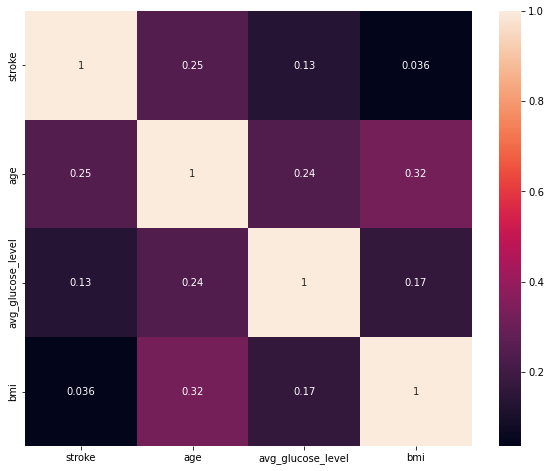

In [38]:
#Correlation heat map against numeric attributes
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(strokeCat[['stroke', 'age', 'avg_glucose_level', 'bmi']].corr(),annot=True)

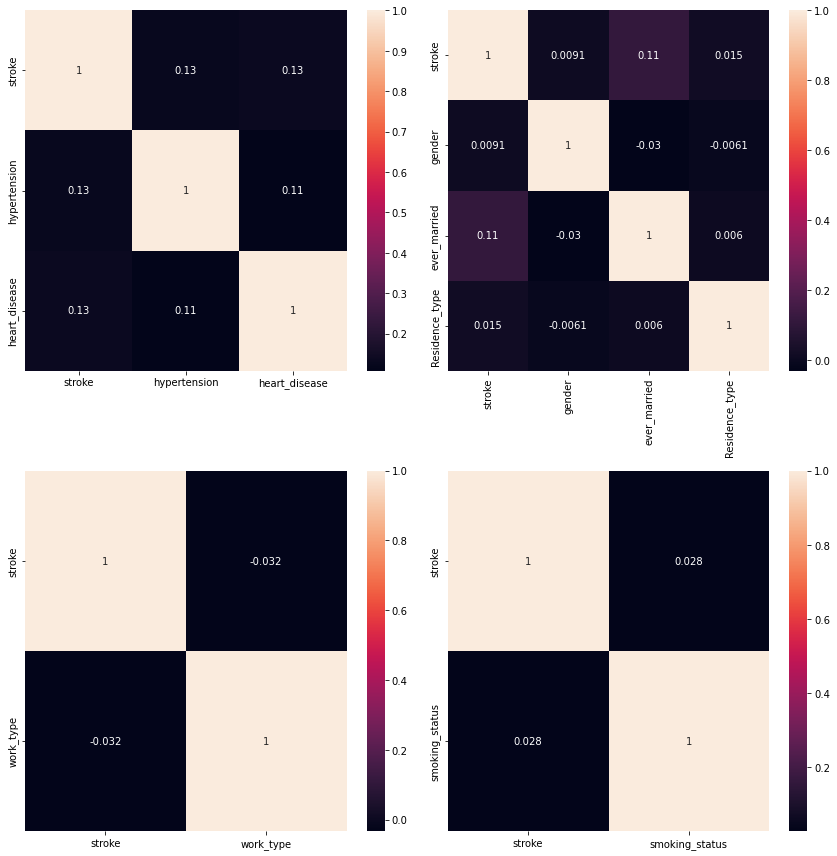

In [39]:
#Correlation heat map against categorical attributes
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

# the "no_" attributes is the opposite to the "yes_" attributes so the correlation to stroke will be the same but negative.
sns.heatmap(strokeCat[['stroke', 'hypertension', 'heart_disease']].corr(),annot=True, ax=ax1)
sns.heatmap(strokeCat[['stroke', 'gender', 'ever_married', 'Residence_type']].corr(),annot=True, ax=ax2)
sns.heatmap(strokeCat[['stroke', 'work_type']].corr(),annot=True, ax=ax3)
sns.heatmap(strokeCat[['stroke', 'smoking_status']].corr(),annot=True, ax=ax4)

plt.tight_layout()
plt.show()

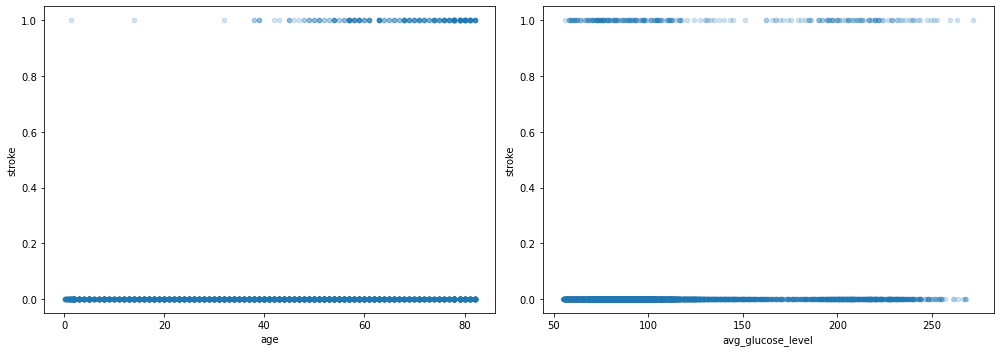

In [40]:
#Stroke plot against age and avg glucose level
strokeClean = strokeCat

fig, ax = plt.subplots(1,2, figsize = (14,5), )
((ax1, ax2)) = ax

strokeClean.plot(ax=ax1, kind='scatter', x='age', y='stroke', alpha = 0.2)
strokeClean.plot(ax=ax2, kind='scatter', x='avg_glucose_level', y='stroke', alpha = 0.2)

plt.tight_layout()
plt.show()

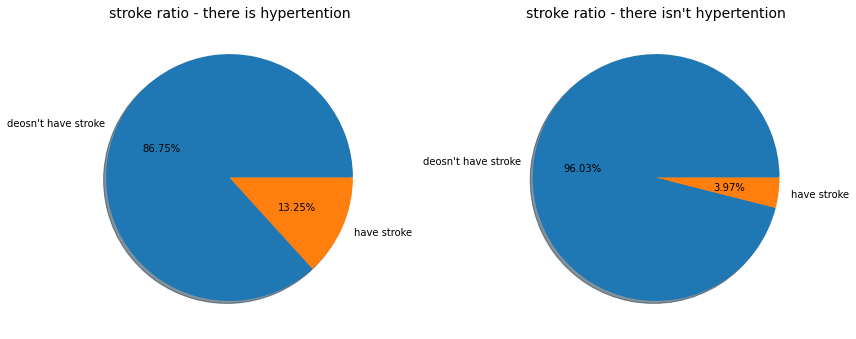

In [41]:
#Stroke correlation with hyptertention
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = strokeClean[strokeClean['hypertension']==1]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - there is hypertention", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = strokeClean[strokeClean['hypertension']==0]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - there isn't hypertention", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

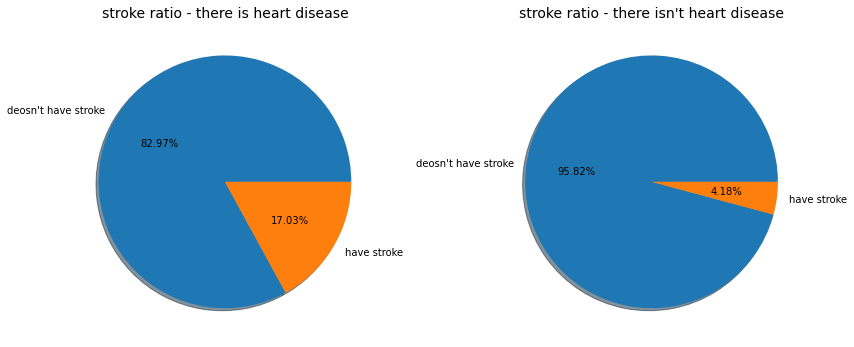

In [42]:
#Stroke Correlation with Heart disease
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = strokeClean[strokeClean['heart_disease']==1]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - there is heart disease", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = strokeClean[strokeClean['heart_disease']==0]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - there isn't heart disease", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

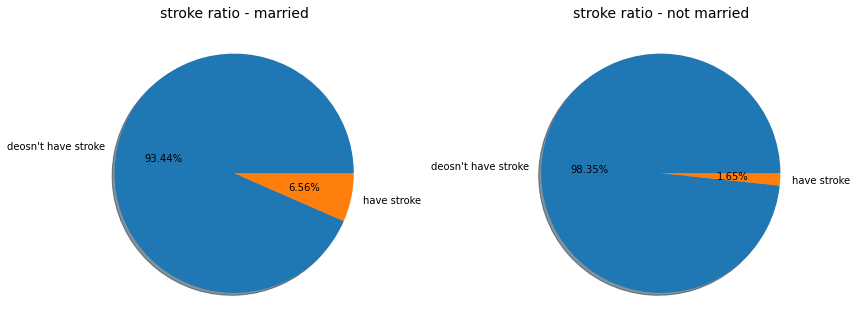

In [43]:
#Stroke Correlation with Marriage
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = strokeClean[strokeClean['ever_married']==1]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - married", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = strokeClean[strokeClean['ever_married']==0]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - not married", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

In [44]:
#BMI Correalation
corr_matrix = strokeClean.corr()
bmi_corr = corr_matrix["bmi"].sort_values(ascending = False).drop('bmi')
print(bmi_corr[bmi_corr>0.15])
print(bmi_corr[bmi_corr<-0.15])

ever_married         0.334770
age                  0.324211
smoking_status       0.218928
avg_glucose_level    0.167033
hypertension         0.158252
Name: bmi, dtype: float64
work_type   -0.299218
Name: bmi, dtype: float64


<AxesSubplot:title={'center':'stroke by bmi'}, xlabel='bmi', ylabel='stroke'>

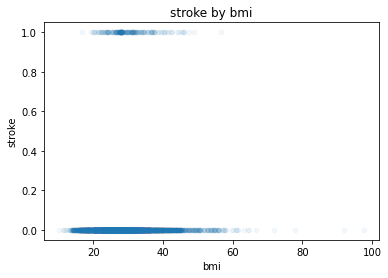

In [45]:
#BMI vs Stroke scatter plot
strokeClean.plot.scatter( x='bmi', y='stroke', alpha = 0.05, title="stroke by bmi")

In [47]:
# check that the pattern above really exist and not because of the plot density:

values_30plusminusBMI = strokeClean[(strokeClean['bmi']>27) & (strokeClean['bmi']<33)]['stroke'].value_counts().tolist()
values_stroke = strokeClean['stroke'].value_counts().tolist()

print("-+30bmi without stroke cases : all without stroke cases (ratio) = " + str(values_30plusminusBMI[0]/values_stroke[0]))
print("-+30bmi : all observations (ratio) = " + str(sum(values_30plusminusBMI)/sum(values_stroke)))
print("-+30bmi with stroke cases : all stroke cases (ratio) = " + str(values_30plusminusBMI[1]/values_stroke[1]))
print("as we can see, among 1/2 of the stroke cases the bmi is around 30. In contrast to cases where there is no stroke where the ratio is significantly lower, only 1/3.")

-+30bmi without stroke cases : all without stroke cases (ratio) = 0.3228395061728395
-+30bmi : all observations (ratio) = 0.33235466823253085
-+30bmi with stroke cases : all stroke cases (ratio) = 0.5180722891566265
as we can see, among 1/2 of the stroke cases the bmi is around 30. In contrast to cases where there is no stroke where the ratio is significantly lower, only 1/3.


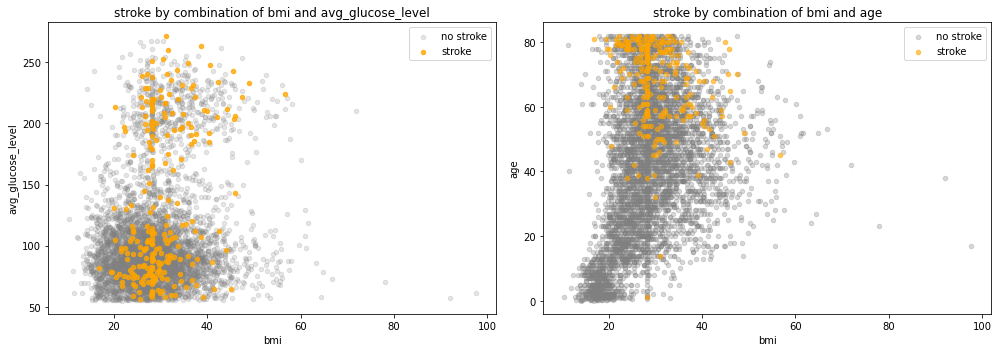

In [48]:
#Scatter plot of bmi vs avg_glucose_level and bmi vs age
fig, ax = plt.subplots(1,2, figsize = (14,5))
((ax1, ax2)) = ax
#stroke by combination of bmi and avg_glucose_level
strokeClean[strokeClean['stroke'] ==0].plot.scatter(ax=ax1, x='bmi', y='avg_glucose_level', alpha = 0.2, c='gray', label='no stroke')
strokeClean[strokeClean['stroke'] ==1].plot.scatter(ax=ax1, x='bmi', y='avg_glucose_level', alpha = 0.8, c='orange', label='stroke')
ax1.legend()
ax1.set_title('stroke by combination of bmi and avg_glucose_level')
#stroke by combination of bmi and age
strokeClean[strokeClean['stroke'] ==0].plot.scatter(ax=ax2, x='bmi', y='age', alpha = 0.3, c='gray', label='no stroke')
strokeClean[strokeClean['stroke'] ==1].plot.scatter(ax=ax2, x='bmi', y='age', alpha = 0.6, c='orange', label='stroke')
ax2.legend()
ax2.set_title('stroke by combination of bmi and age')

plt.tight_layout()
plt.show()

##### Preparing Dataset for Modeling

**I am going to Split my data set into train and test data sets(75/25) and apply knn modelling with standard Scalar and hyper parameters for grid search**


In [49]:
strokeClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   int64  
 7   Residence_type     5109 non-null   int64  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   int64  
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 518.9 KB


In [50]:
#import necessary libraries
from sklearn.model_selection import train_test_split

In [51]:
#stroke Target value is taken as a numpy array
y = strokeClean["stroke"].values
#All the features are separated from our target value or label and stored in x
X = strokeClean.drop(["stroke","id"],axis=1)

In [52]:
#Split data into training and testing sets - 75/25 Train and test size
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=142, train_size=0.75, test_size=0.25)

In [53]:
#printing Size and shape of the target and features for test and train
print(X_train.shape)
print(y_train.size)
print(X_test.shape)
print(y_test.size)

(3831, 10)
3831
(1278, 10)
1278


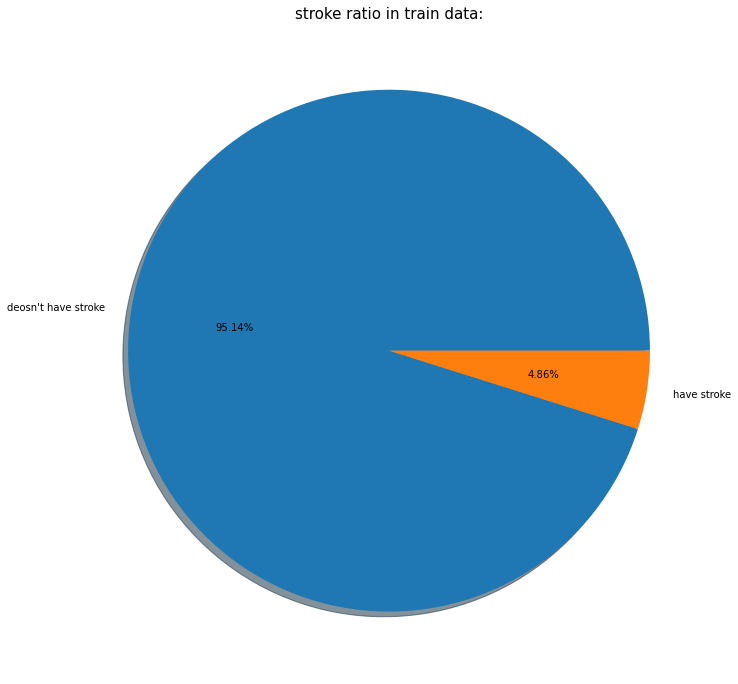

Values for No and Yes Stroke: [3645, 186]


In [54]:
train_df = pd.DataFrame(y_train,columns=['Stroke'])

fig, ax = plt.subplots(1,1, figsize = (12,12))
labels = ["deosn't have stroke", "have stroke"]
values_train = train_df.value_counts().tolist()

ax.pie(x=values_train, labels=labels, autopct="%1.2f%%", shadow=True)
ax.set_title("stroke ratio in train data:", fontdict={'fontsize': 15})
plt.show()
print("Values for No and Yes Stroke: " +str(values_train))

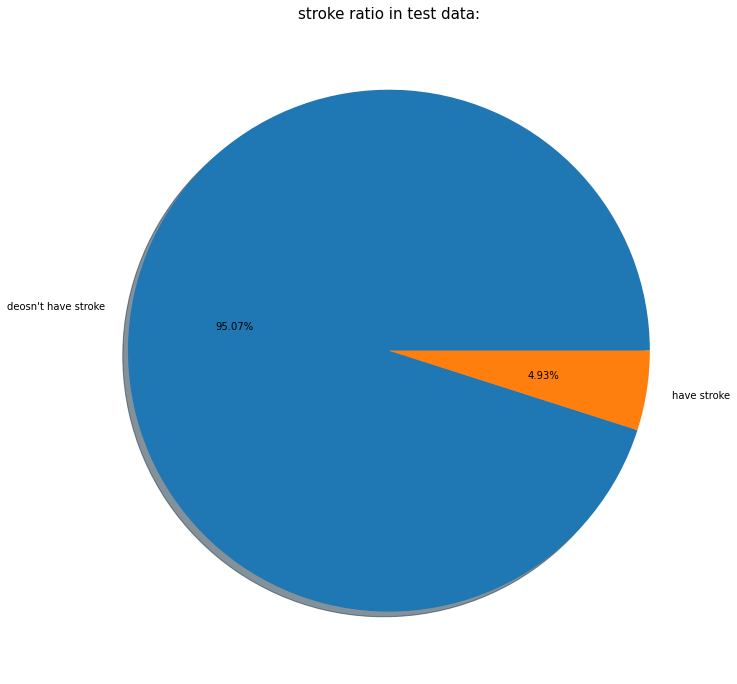

Values for No and Yes Stroke: [1215, 63]


In [55]:
test_df = pd.DataFrame(y_test,columns=['Stroke'])

fig, ax = plt.subplots(1,1, figsize = (12,12))
labels = ["deosn't have stroke", "have stroke"]
values_test = test_df.value_counts().tolist()

ax.pie(x=values_test, labels=labels, autopct="%1.2f%%", shadow=True)
ax.set_title("stroke ratio in test data:", fontdict={'fontsize': 15})
plt.show()
print("Values for No and Yes Stroke: " +str(values_test))

##### Knn Modelling With Original Train and Test data

In [56]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler

In [57]:
#MinMax Scalacr
scaler = StandardScaler()
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1) 
# Create a pipeline
pipe = Pipeline([("scaler", scaler),("knn", knn)])

In [58]:
#Scaling Test and Train Data feature set using MinMax Scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

In [60]:
# Create grid search with fitting the train data
grid = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X_train_scaled, y_train)

In [61]:
# Best neighborhood size (k)
print("Best K value: %.0f"  % (grid.best_estimator_.get_params()["knn__n_neighbors"]))

Best K value: 8


In [62]:
#Grid Search prediction on test set
grid_pred = grid.predict(X_test_scaled)

In [63]:
#Checking Accuracy Score
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Accuracy: 0.9515
precision: 0.9538
recall: 0.9515
f1 Score: 0.9286
Confusion Matrix for Prediction:


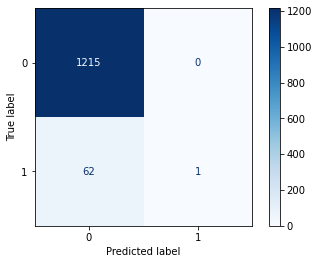

In [64]:
#Calculating metrics
accuracy=accuracy_score(y_test, grid_pred)
precision = precision_score(y_test, grid_pred, average='weighted')
recall=recall_score(y_test, grid_pred, average='weighted')
f1 = f1_score(y_test, grid_pred, average='weighted')
print("Accuracy: %.4f"  % (accuracy))
print("precision: %.4f"  % (precision))
print("recall: %.4f"  % (recall))
print("f1 Score: %.4f"  % (f1))
print("Confusion Matrix for Prediction:")
cm=confusion_matrix(y_test, grid_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

**Observations**
<br> My target variable for the modelling is a classification which is essentially to predict based on the feature values, if the patient is going to have a stroke event or not.
<br> Part of my modelling, I have imputed missing values and cleaned a outlier within gender variable.
<br> Then, I have created a knn model with standard Scalar and hyper parameter search using 10 n_neighbors.

I see that knn model has resulted in very high accuracy/precision/recall and f1 scores - all of which are > 90%

This high accuracy could be a result of imbalanced dataset (95% negative outcomes, and 5% positive outcomes of stroke).

**As a pathforward I am going to use SMOTE to oversample my unbalanced postive outcome**

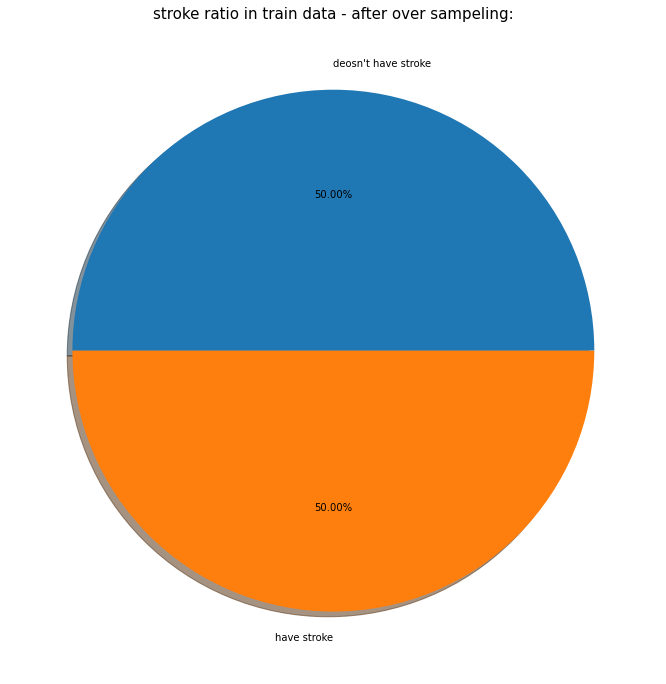

there are now equal number of cases with stroke and without: [3645, 3645]


In [65]:
from imblearn.over_sampling import SMOTE # loading Library
#Over Sampling data using SMOTE
oversample = SMOTE()
XUp, yUp = oversample.fit_resample(X_train_scaled, y_train)
upsampled_df = pd.DataFrame(yUp,columns=['Stroke'])

fig, ax = plt.subplots(1,1, figsize = (12,12))
labels = ["deosn't have stroke", "have stroke"]
values_upsample = upsampled_df.value_counts().tolist()

ax.pie(x=values_upsample, labels=labels, autopct="%1.2f%%", shadow=True)
ax.set_title("stroke ratio in train data - after over sampeling:", fontdict={'fontsize': 15})
plt.show()
print("there are now equal number of cases with stroke and without: " +str(values_upsample))

##### Performing few Models to see individual accuracies

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [68]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
x_train_res=XUp
y_train_res=yUp
x_test=X_test_scaled


lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred,average='weighted')  #Precision Score
    recall = recall_score(y_test, y_pred,average='weighted')  #Recall Score
    f1 = f1_score(y_test, y_pred,average='weighted')  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[905 310]
 [ 15  48]]
Accuracy Score:  0.7456964006259781

K-Fold Validation Mean Accuracy: 78.22 %

Standard Deviation: 1.70 %

ROC AUC Score: 0.75

Precision: 0.94

Recall: 0.75

F1: 0.82
-----------------------------------

SVM :
[[943 272]
 [ 27  36]]
Accuracy Score:  0.7660406885758998

K-Fold Validation Mean Accuracy: 84.58 %

Standard Deviation: 1.33 %

ROC AUC Score: 0.67

Precision: 0.93

Recall: 0.77

F1: 0.83
-----------------------------------

KNeighbors :
[[1031  184]
 [  43   20]]
Accuracy Score:  0.8223787167449139

K-Fold Validation Mean Accuracy: 90.96 %

Standard Deviation: 0.92 %

ROC AUC Score: 0.58

Precision: 0.92

Recall: 0.82

F1: 0.86
-----------------------------------

GaussianNB :
[[878 337]
 [ 16  47]]
Accuracy Score:  0.7237871674491393

K-Fold Validation Mean Accuracy: 77.38 %

Standard Deviation: 1.64 %

ROC AUC Score: 0.73

Precision: 0.94

Recall: 0.72

F1: 0.80
-----------------------------------

BernoulliNB :
[[686 529]
 [  8

##### Rerunning same KNN Grid Searh Pipe with Train data augmented to balance classes using SMOTE

In [69]:
# Create grid search with fitting the train data
gridUp = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(XUp, yUp)

In [70]:
# Best neighborhood size (k)
print("Best K value: %.0f"  % (gridUp.best_estimator_.get_params()["knn__n_neighbors"]))

Best K value: 1


In [71]:
#Grid Search prediction on test set
grid_predUp = gridUp.predict(X_test_scaled)

Accuracy: 0.8858
precision: 0.9137
recall: 0.8858
f1 Score: 0.8990
Confusion Matrix for Prediction:


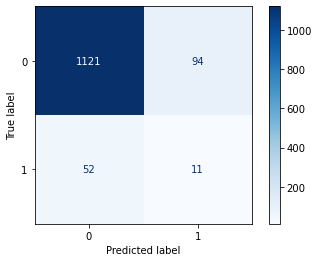

In [72]:
#Calculating metrics
accuracy=accuracy_score(y_test, grid_predUp)
precision = precision_score(y_test, grid_predUp, average='weighted')
recall=recall_score(y_test, grid_predUp, average='weighted')
f1 = f1_score(y_test, grid_predUp, average='weighted')
print("Accuracy: %.4f"  % (accuracy))
print("precision: %.4f"  % (precision))
print("recall: %.4f"  % (recall))
print("f1 Score: %.4f"  % (f1))
print("Confusion Matrix for Prediction:")
cm1=confusion_matrix(y_test, grid_predUp)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)

disp1.plot(cmap=plt.cm.Blues)
plt.show()

**Observation**
<br> After realizing my model is not identifying any positive outcome, I have used SMOTE to balance my training set to include more values for positive outcome.

Several of the individual models like Logistics regression to Random Forest classifier had lesser precision than original KNN Model.

This retraining with updated train data resulted in a slight reduction of accuracy and other measures compared to original data based KNN modelling. But have successfully classified the outcomes that are postive.

I see that knn model has resulted in very high accuracy/precision/recall and f1 scores - all of which are in high 80s
<br>This is a slight drop in the metrics from previous iteration, however this is a better model as the data properly identifies all target classes.
